In [1]:
%%HTML
    
<!-- reveal.js CSS theme and local overrides -->
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open+Sans:300,400,600,700&amp;lang=en"/>
<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Merriweather:italic&amp;lang=en"/>
<link rel="stylesheet" href="stylefiles/presentation.css"/> 

<section id="title-slide"> 
    <br><br><br><h1><i>Module 1-3: Flavors of Persistence</i></h1>
    <h3><i>Rips and Cubical</i></h3>
    <br><br>
    <h4><i>5/15/2023</i></h4>
    <br><br>
    <div id='title-slide' class="pull-right"><img id="logo" src="figures/msu_seal.png" width="100%" height="100%"></div>
    <div class="uu_title_container">
        <smaller>
        <div>
            <b>Presented by:</b> Your Name
            <br><br><br><br>
            <b>Topological Signal Processing for Dynamical Systems</b><br>
            SIAM-DS Minitutorial 2023
        </div>  
        </smaller>
    </div><br>
    <div class='footer'>
        Michigan State University
    </div>
</section>

# Big picture intro slide 

## Goals of this module

- Define filtrations based on a simplicial map
- Define Rips complex filtrations from a point cloud 
- Define Cubical complex filtrations from a matrix/image


# Filtrations from functions


<div class = 'row'>
<div class = 'column'>

## Definition

A simplex-wise filtration $f:K \to \mathbb{R}$ is called monotone if: 
- for every $\tau \leq \sigma$, $f(\tau) \leq f(\sigma)$.
    

    

   
</div>
<div class = 'column'>
    
## Example
    
<img src = 'figures/1-1_ExFiltration-Function.png' width = 40% height = 'auto'>

<img src = 'figures/1-1_ExFiltration-NoCycles.png'>
    

    
    
</div>
</div>

# Rips Complex
<div class = 'row'>
<div class = 'column'>

## Definition

Given an input point cloud $\chi \subseteq \mathbb{R}^d$
    
Define a function on the complete simplicial complex $K$ with vertex set $V \simeq \chi$:
    
- *Vertices:* $f(v) = 0$
- *Edges:* $f(uv) = \|u-v\|$ for the endpoints representing points in the point cloud 
- *Everything else:* $f(\sigma) = \max\{ f(uv) \mid uv \leq \sigma \}$
    
*Note: point cloud in $\mathbb{R}^d$ isn't required.... only need to have pairwise distance information*
   
</div>
<div class = 'column'>
    
## Example
    
<img src = 'figures/EmbeddingDisksExample.png' width = 80% height = 'auto'>

   
</div>
</div>

# Cubical Complex

## Definition
An elementary interval is a unit interval $[k, k+1]$ or a degenerate interval $[k, k]$. For a $d$-dimensional space, a cube is a product of $d$ elementary intervals. The number of non-degenerate intervals in such a product is the dimension of this cube, defined as follows:

<img src = 'figures/Cubical/cubical_blocks1.png' width = 60% height = 'auto'>

A cubical complex of dimension $d$ is a collection of cubes of dimension at most $d$.

- For 1D (time series) data, the cubical complex would be a collection of $0$- and $1$-cubes.

- For 2D (image) data, the cubical complex would be a collection of $0$-, $1$- and $2$-cubes.

- For 3D (volume) data, the cubical complex would be a collection of $0$-, $1$-, $2$- and $3$-cubes.

Here, we focus only on 2D (image) data.

# Cubical Complex Formulation

Two possible ways:

- Assign function values to faces
<img src = 'figures/Cubical/cubical_type2.png' width = 60% height = 'auto'>

On filtration:
- If two vertices get included, the corresponding edge gets included.
- If four edges get included, the corresponding face gets included.

- Assign function values to vertices
<img src = 'figures/Cubical/cubical_type1.png' width = 60% height = 'auto'>

On filtration:
- If a face gets included, all corresponding edges and vertices get included.

This reduces the complex to essentially a matrix of faces.

Here, we focus on this type of formulation only.

# Example

## Sublevel Filtration

![](figures/Cubical/Cubical_Sublevel.png)

### Persistence Diagram
<img src = 'figures/Cubical/Cubical_Sublevel_PD.png' width = 40% height = 'auto'>

## Example with Code

In [15]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
from gtda.homology import CubicalPersistence
from gtda.diagrams import Filtering

In [16]:
# Generate grid and function

X1, X2 = np.mgrid[-3:3:250j, -3:3:250j]
Density = np.exp(-0.5 * ((X1 ** 2 + X2 ** 2) ** 2 - 4 * (X1 ** 2 + X2 ** 2)))

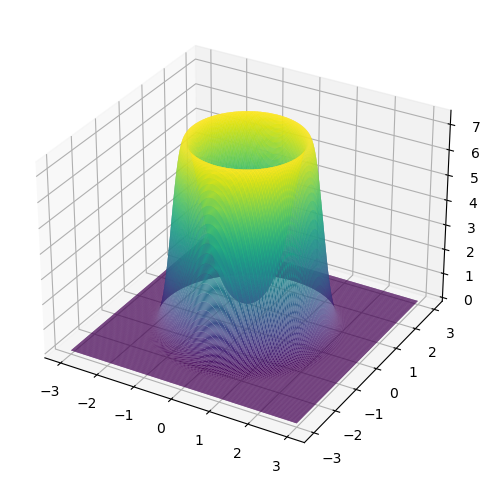

In [17]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X1, X2, Density, rstride=1, cstride=1, cmap='viridis', edgecolor='none')


In [23]:
# Find Cubical Persistence

Density = np.array([Density])
cubical_persistence = CubicalPersistence(n_jobs=-1, reduced_homology=False)
Persistence = cubical_persistence.fit_transform(Density)

filtered = Filtering(epsilon=10 ** -2)
Filtered_Persistence = filtered.fit_transform(Persistence)
plot = filtered.plot(Filtered_Persistence)
plot.show()

# Example

## Superlevel Filtration

Instead of going from bottom to top, we go from top to bottom.

Take the following density for example:

<img src = 'figures/Cubical/Density.png' width = 40% height = 'auto'>

In [24]:
from ipywidgets import Video
Video.from_file("figures/Cubical/Cubical.mp4")

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x11\x18\xe2mdat\x0…

# A slide that makes it clear that they're about to start doing examples